In [1]:
import os
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

#os.environ['CUDA_VISIBLE_DEVICES'] = ''    
#if tf.test.gpu_device_name():
#    print('GPU found')
#else:
#    print("No GPU found")

print(tf.__version__)

1.13.0-rc1


In [0]:
mnist = keras.datasets.mnist

In [0]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [0]:
x_train,x_test = x_train/255.,x_test/255.

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
y_train.shape

(60000,)

In [8]:
x_test.shape

(10000, 28, 28)

In [9]:
y_test.shape

(10000,)

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
# train the model
model.fit(x_train, y_train, epochs=5)


Epoch 1/5
60000/60000 [==============================] - 8s 129us/sample - loss: 0.2522 - acc: 0.9276
Epoch 2/5
60000/60000 [==============================] - 7s 115us/sample - loss: 0.1098 - acc: 0.9680
Epoch 3/5
60000/60000 [==============================] - 7s 115us/sample - loss: 0.0771 - acc: 0.9769
Epoch 4/5
60000/60000 [==============================] - 7s 123us/sample - loss: 0.0565 - acc: 0.9822
Epoch 5/5
60000/60000 [==============================] - 7s 120us/sample - loss: 0.0440 - acc: 0.9866


In [14]:
# with test data
test_loss, test_acc = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 67us/sample - loss: 0.0785 - acc: 0.9763


In [15]:
print('accuracy of testing data:', test_acc)

('accuracy of testing data:', 0.9763)


In [0]:
# predict
predictions = model.predict(x_test)

In [17]:
predictions[0]

array([3.1022960e-08, 5.4827547e-09, 3.2992166e-06, 1.3858519e-05,
       3.8322177e-13, 9.2814290e-08, 1.4896538e-12, 9.9998260e-01,
       9.0865576e-08, 4.2636849e-08], dtype=float32)

In [18]:
np.argmax(predictions[0])

7

In [19]:
y_test[0]

7

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

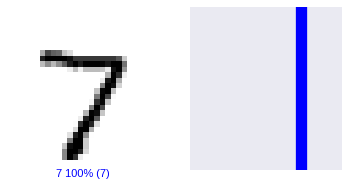

In [25]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions, y_test)
plt.show()

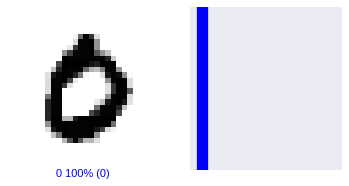

In [27]:
i = 3
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  y_test)
plt.show()